<a href="https://colab.research.google.com/github/Theuncannycatalyst/Car_Prices_Analysis_And_Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving car_price_dataset.csv to car_price_dataset.csv


In [ ]:
import pandas as pd
df = pd.read("car_price_dataset.csv")
print(df.in)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB
None
Brand           False
Model           False
Year            False
Engine_Size     False
Fuel_Type       False
Transmission    False
Mileage         False
Doors           False
Owner_Count     False
Price           False
dtype: bool


In [ ]:
categorical_cols = ["Brand", "Model", "Fuel_Type", "Transmission"]
for col in categorical_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print("-"*20)

Value Counts for Brand
Brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64
--------------------
Value Counts for Model
Model
Accord      365
Fiesta      363
Impala      355
5 Series    353
Tiguan      352
Focus       351
Q5          350
A4          350
Elantra     347
Golf        339
A3          338
Optima      336
Civic       336
3 Series    335
Explorer    334
Malibu      333
Passat      329
Tucson      329
Rio         327
Corolla     325
RAV4        324
Camry       321
E-Class     321
Sonata      319
Equinox     315
GLA         315
Sportage    313
X5          311
CR-V        308
C-Class     306
Name: count, dtype: int64
--------------------
Value Counts for Fuel_Type
Fuel_Type
Electric    2625
Diesel      2512
Hybrid      2453
Petrol      2410
Name: count, dtype: int64
--------------------
Value Counts for Transmiss

In [ ]:
numerical_cols = ["Year", "Mileage", "Doors", "Owner_Count", "Price", "Engine_Size"]
print(df[numerical_cols].describe())

               Year        Mileage         Doors   Owner_Count        Price  \
count  10000.000000   10000.000000  10000.000000  10000.000000  10000.00000   
mean    2011.543700  149239.111800      3.497100      2.991100   8852.96440   
std        6.897699   86322.348957      1.110097      1.422682   3112.59681   
min     2000.000000      25.000000      2.000000      1.000000   2000.00000   
25%     2006.000000   74649.250000      3.000000      2.000000   6646.00000   
50%     2012.000000  149587.000000      3.000000      3.000000   8858.50000   
75%     2017.000000  223577.500000      4.000000      4.000000  11086.50000   
max     2023.000000  299947.000000      5.000000      5.000000  18301.00000   

        Engine_Size  
count  10000.000000  
mean       3.000560  
std        1.149324  
min        1.000000  
25%        2.000000  
50%        3.000000  
75%        4.000000  
max        5.000000  


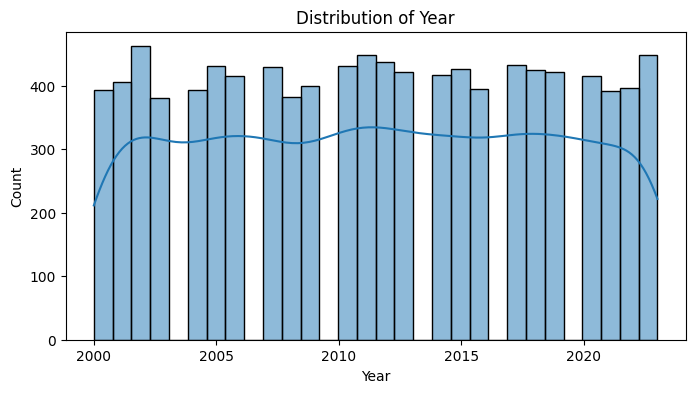

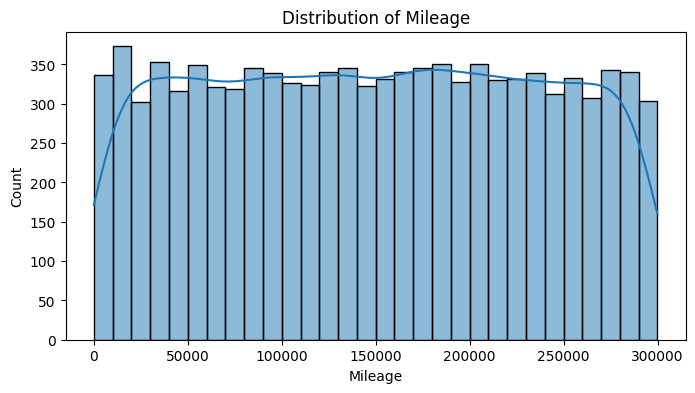

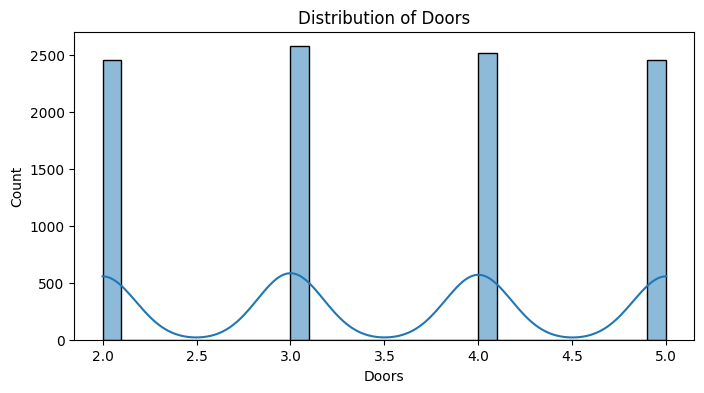

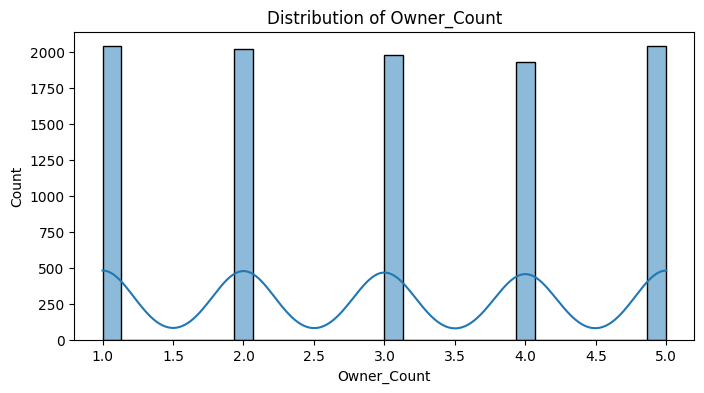

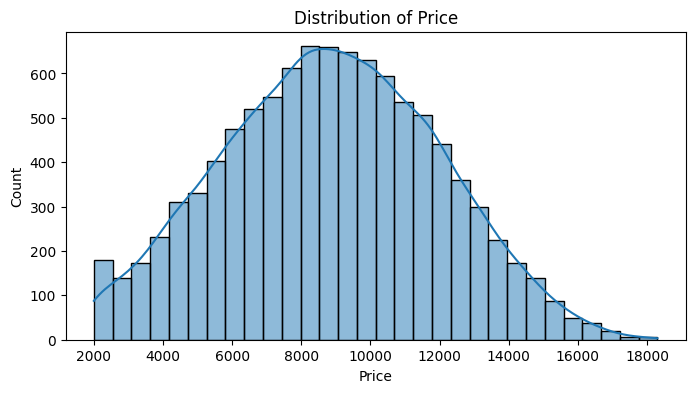

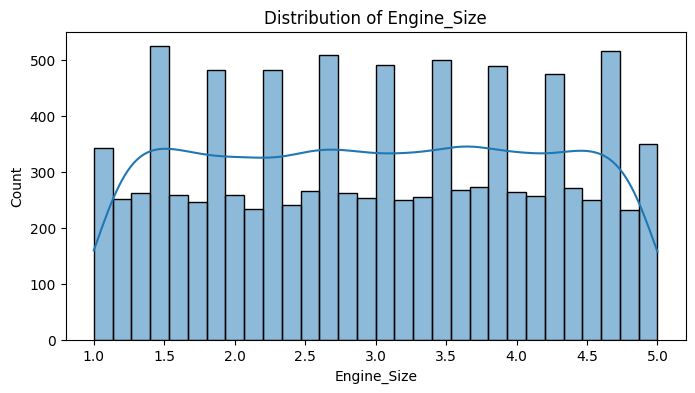

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in numerical_cols:
  plt.figure(figsize=(8, 4))
  sns.histplot(data=df, x=col, kde=True, bins=30)
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

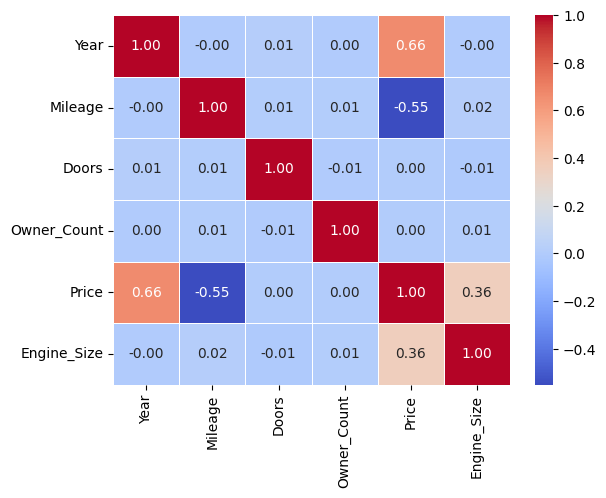

In [ ]:
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.show()

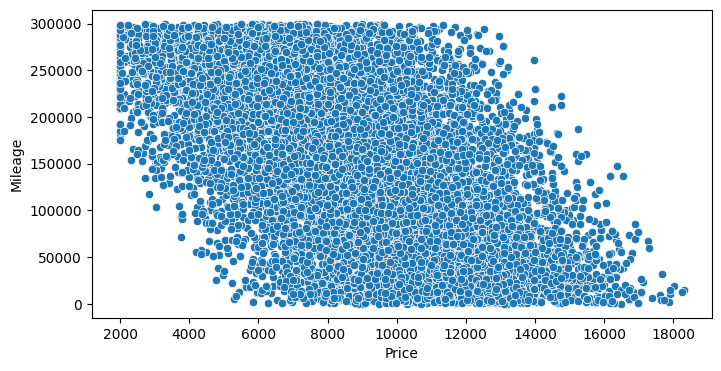

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x="Price", y="Mileage")
plt.show()

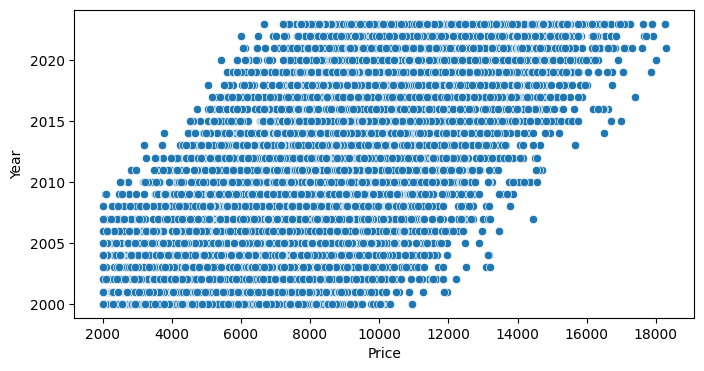

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x="Price", y="Year")
plt.show()

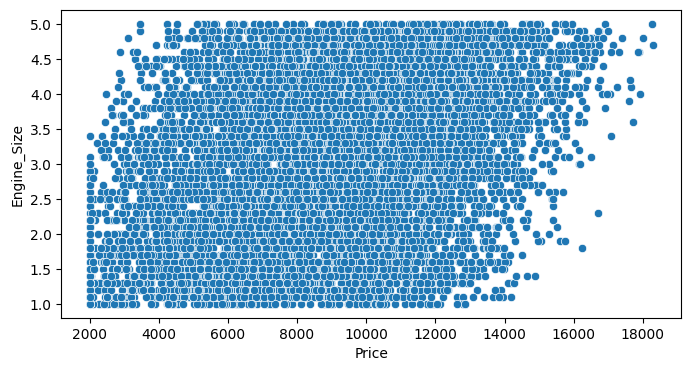

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x="Price", y="Engine_Size")
plt.show()

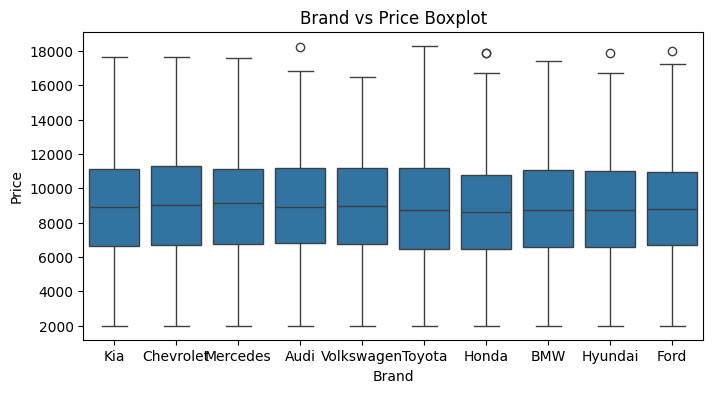

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="Brand", y="Price")
plt.title("Brand vs Price Boxplot")
plt.show()

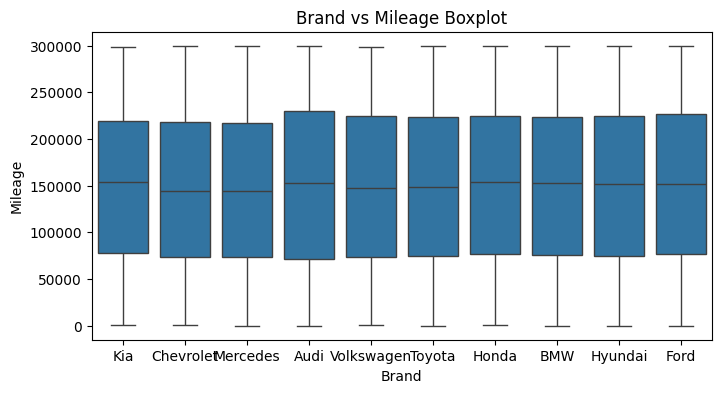

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="Brand", y="Mileage")
plt.title("Brand vs Mileage Boxplot")
plt.show()

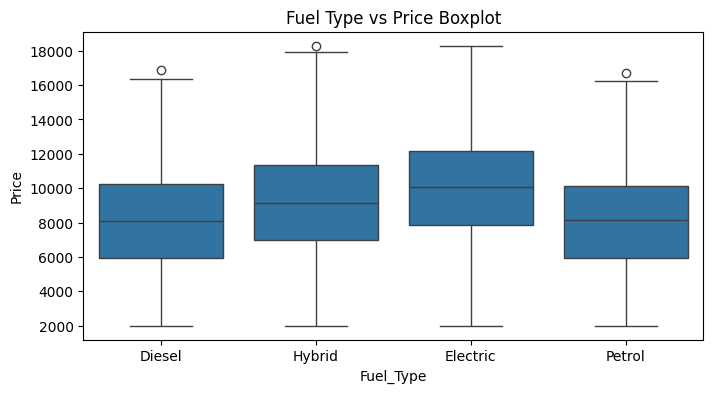

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="Fuel_Type", y="Price")
plt.title("Fuel Type vs Price Boxplot")
plt.show()

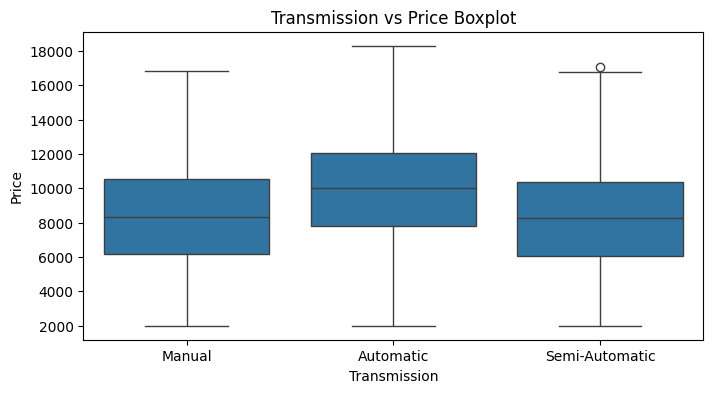

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="Transmission", y="Price")
plt.title("Transmission vs Price Boxplot")
plt.show()

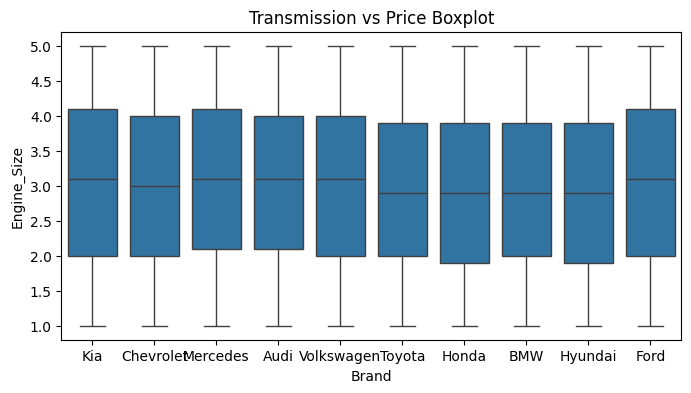

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="Brand", y="Engine_Size")
plt.title("Transmission vs Price Boxplot")
plt.show()

In [ ]:
print(df.columns)

Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price'],
      dtype='object')


Machine learning model to predict car price

In [ ]:
#selecting the target columns and features to be used
target_column = "Price"
potential_feature_columns = [col for col in df.columns if col !=target_column]
known_important_features = ["Brand", "Model", "Year", "Engine_Size", "Fuel_Type", "Transmission", "Mileage", "Doors", "Owner_Count"]
final_features = [feature for feature in known_important_features if feature in potential_feature_columns]
X = df[final_features]
y = df[target_column]
print("Selected Features: ", final_features)
print("Shape of X before encoding: ", X.shape)

Selected Features:  ['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission', 'Mileage', 'Doors', 'Owner_Count']
Shape of X before encoding:  (10000, 9)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
#data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
categorical_cols = [col for col in X.columns if X[col].dtype=="object"]
#encoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
#fit and transform on training data
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
encoded_columns = encoder.get_feature_names_out(categorical_cols)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_columns, index=X_train.index)
#transform on test data
X_test_encoded = encoder.transform(X_test[categorical_cols])
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_columns, index=X_test.index)
#concatinate encoded data
X_train = X_train.drop(categorical_cols, axis=1)
X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = X_test.drop(categorical_cols, axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)
print("\n Categorical columns encoded: ", categorical_cols)
print("\n Shape of X_train after encoding", X_train.shape)
print("\n Head of X_train after encoding")
print(X_train.head())
print("\nShape of X_test after encoding: ", X_test.shape)
print("\nHead of X_test after encoding: ")
print(X_test.head())


 Categorical columns encoded:  ['Brand', 'Model', 'Fuel_Type', 'Transmission']

 Shape of X_train after encoding (8000, 52)

 Head of X_train after encoding
      Year  Engine_Size  Mileage  Doors  Owner_Count  Brand_Audi  Brand_BMW  \
9254  2007          3.2    33948      5            4         0.0        0.0   
1561  2010          4.8   224853      2            1         0.0        1.0   
1670  2006          1.9    13435      3            5         0.0        0.0   
6087  2019          1.7   199846      2            3         0.0        0.0   
6669  2005          3.6      261      3            2         0.0        0.0   

      Brand_Chevrolet  Brand_Ford  Brand_Honda  ...  Model_Tiguan  \
9254              0.0         0.0          0.0  ...           0.0   
1561              0.0         0.0          0.0  ...           0.0   
1670              0.0         0.0          0.0  ...           0.0   
6087              0.0         0.0          1.0  ...           0.0   
6669              0.0 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
model=RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\n Mean Absolute Error: {mae}")
print(f"R-Squared: {r2}")


 Mean Absolute Error: 260.37786
R-Squared: 0.9878961113544674


In [ ]:
test_data = {
    "Brand" : ["Hyundai"],
    "Model" : ["Sonata"],
    "Year" : [2017],
    "Engine_Size" : [1.6],
    "Fuel_Type" : ["Petrol"],
    "Transmission" : ["Automatic"],
    "Mileage" : [42069],
    "Doors" : [4],
    "Owner_Count" : [1],
}
#convert example data into dataframe
test_data_df = pd.DataFrame(test_data)
#preprocess the test data
categorical_cols = [col for col in test_data_df.columns if test_data_df[col].dtype=="object"]
test_data_encoded = encoder.transform(test_data_df[categorical_cols])
encoded_columns = encoder.get_feature_names_out(categorical_cols)
test_data_encoded = pd.DataFrame(test_data_encoded, columns=encoded_columns, index=test_data_df.index)
test_data_df = test_data_df.drop(categorical_cols, axis=1)
test_data_df = pd.concat([test_data_df, test_data_encoded], axis=1)
predicted_price = model.predict(test_data_df)
print("Predicted Price:", predicted_price[0])

Predicted Price: 11595.63


In [ ]:
test_data = {
    "Brand" : ["Honda"],
    "Model" : ["Fit"],
    "Year" : [2018],
    "Engine_Size" : [1.5],
    "Fuel_Type" : ["Hybrid"],
    "Transmission" : ["Automatic"],
    "Mileage" : [69420],
    "Doors" : [4],
    "Owner_Count" : [3],
}
#convert example data into dataframe
test_data_df = pd.DataFrame(test_data)
#preprocess the test data
categorical_cols = [col for col in test_data_df.columns if test_data_df[col].dtype=="object"]
test_data_encoded = encoder.transform(test_data_df[categorical_cols])
encoded_columns = encoder.get_feature_names_out(categorical_cols)
test_data_encoded = pd.DataFrame(test_data_encoded, columns=encoded_columns, index=test_data_df.index)
test_data_df = test_data_df.drop(categorical_cols, axis=1)
test_data_df = pd.concat([test_data_df, test_data_encoded], axis=1)
predicted_price = model.predict(test_data_df)
print("Predicted Price:", predicted_price[0])

Predicted Price: 12290.43


In [ ]:
test_data = {
    "Brand" : ["Toyota"],
    "Model" : ["Corolla"],
    "Year" : [2010],
    "Engine_Size" : [1.8],
    "Fuel_Type" : ["Petrol"],
    "Transmission" : ["Automatic"],
    "Mileage" : [167855],
    "Doors" : [4],
    "Owner_Count" : [5],
}
#convert example data into dataframe
test_data_df = pd.DataFrame(test_data)
#preprocess the test data
categorical_cols = [col for col in test_data_df.columns if test_data_df[col].dtype=="object"]
test_data_encoded = encoder.transform(test_data_df[categorical_cols])
encoded_columns = encoder.get_feature_names_out(categorical_cols)
test_data_encoded = pd.DataFrame(test_data_encoded, columns=encoded_columns, index=test_data_df.index)
test_data_df = test_data_df.drop(categorical_cols, axis=1)
test_data_df = pd.concat([test_data_df, test_data_encoded], axis=1)
predicted_price = model.predict(test_data_df)
print("Predicted Price :", predicted_price[0])

Predicted Price : 7019.51


In [ ]:
feature_importances = model.feature_importances_
feature_names = X_train.columns

feature_importances_df = pd.DataFrame({
    "Feature" : feature_names,
    "Importance" : feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by="Importance", ascending = False)
print(feature_importances_df)


                        Feature  Importance
0                          Year    0.437551
2                       Mileage    0.311739
1                   Engine_Size    0.134543
46           Fuel_Type_Electric    0.049520
49       Transmission_Automatic    0.045994
47             Fuel_Type_Hybrid    0.009234
4                   Owner_Count    0.001459
3                         Doors    0.001294
48             Fuel_Type_Petrol    0.001102
45             Fuel_Type_Diesel    0.001050
51  Transmission_Semi-Automatic    0.000278
14             Brand_Volkswagen    0.000264
50          Transmission_Manual    0.000263
6                     Brand_BMW    0.000259
5                    Brand_Audi    0.000256
11                    Brand_Kia    0.000250
7               Brand_Chevrolet    0.000247
10                Brand_Hyundai    0.000245
9                   Brand_Honda    0.000241
13                 Brand_Toyota    0.000238
8                    Brand_Ford    0.000236
12               Brand_Mercedes 

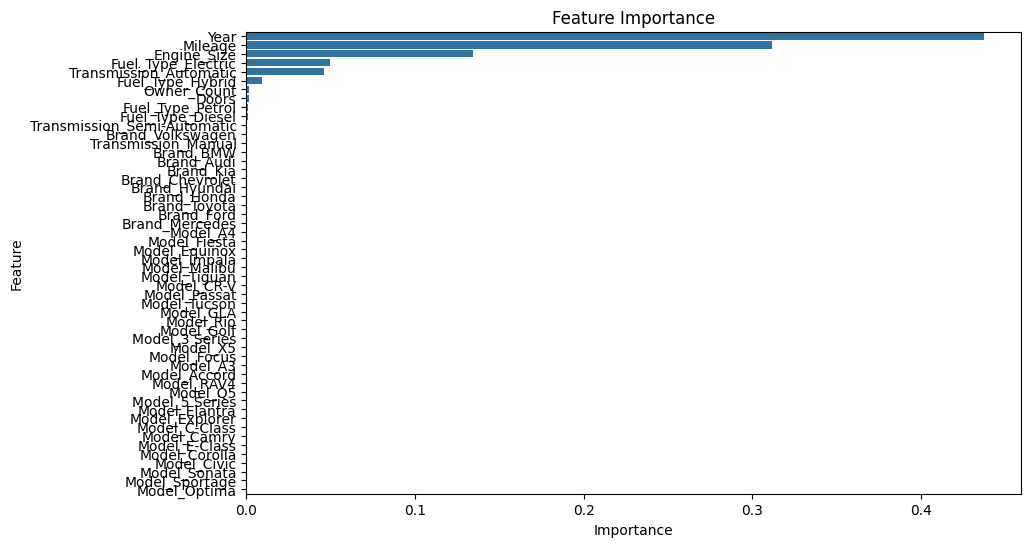

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importance')
plt.show()